**Importing necessary libraies**

In [81]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**Loading the dataset**

In [84]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ["ID", "Diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

**Dropping unecessary columns**

In [86]:
data = data.drop("ID", axis=1)

**Encodes the "Diagnosis" column into numerical labels**

In [88]:
label_encoder = LabelEncoder()
data["Diagnosis"] = label_encoder.fit_transform(data["Diagnosis"])

**Feature Scaling Using StandardScaler**

In [90]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop("Diagnosis", axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=numerical_columns)
data_scaled["Diagnosis"] = data["Diagnosis"]


**Outlier Detection for Individual Features using Z-scores (Z > 3) with counts and percentages calculated for each feature.**

In [92]:
# Outlier Detection for Individual Features
from scipy.stats import zscore

# Calculate Z-scores directly on the DataFrame's numerical columns
z_scores = data_scaled[numerical_columns].apply(zscore)

# Initialize dictionaries to store outlier count and percentage for each feature
outlier_counts = {}
outlier_percentages = {}

# Loop through each feature to calculate outliers individually
for feature in numerical_columns:
    feature_outliers = np.sum(z_scores[feature] > 3)  # Count of outliers in this feature
    outlier_percentage = (feature_outliers / data_scaled.shape[0]) * 100  # Percentage of outliers

    # Store in dictionaries
    outlier_counts[feature] = feature_outliers
    outlier_percentages[feature] = outlier_percentage

    print(f"Feature: {feature}")
    print(f"Outlier Count: {feature_outliers}")
    print(f"Outlier Percentage: {outlier_percentage:.2f}%\n")

# Print summaries for all features
print("Outlier Counts by Feature:", outlier_counts)

Feature: feature_1
Outlier Count: 5
Outlier Percentage: 0.88%

Feature: feature_2
Outlier Count: 4
Outlier Percentage: 0.70%

Feature: feature_3
Outlier Count: 7
Outlier Percentage: 1.23%

Feature: feature_4
Outlier Count: 8
Outlier Percentage: 1.41%

Feature: feature_5
Outlier Count: 4
Outlier Percentage: 0.70%

Feature: feature_6
Outlier Count: 9
Outlier Percentage: 1.58%

Feature: feature_7
Outlier Count: 9
Outlier Percentage: 1.58%

Feature: feature_8
Outlier Count: 6
Outlier Percentage: 1.05%

Feature: feature_9
Outlier Count: 5
Outlier Percentage: 0.88%

Feature: feature_10
Outlier Count: 7
Outlier Percentage: 1.23%

Feature: feature_11
Outlier Count: 7
Outlier Percentage: 1.23%

Feature: feature_12
Outlier Count: 9
Outlier Percentage: 1.58%

Feature: feature_13
Outlier Count: 8
Outlier Percentage: 1.41%

Feature: feature_14
Outlier Count: 6
Outlier Percentage: 1.05%

Feature: feature_15
Outlier Count: 7
Outlier Percentage: 1.23%

Feature: feature_16
Outlier Count: 12
Outlier Per

C:\Users\91979\AppData\Local\Temp\ipykernel_1456\793605801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()), palette='viridis')  # Ensure correct palette usage


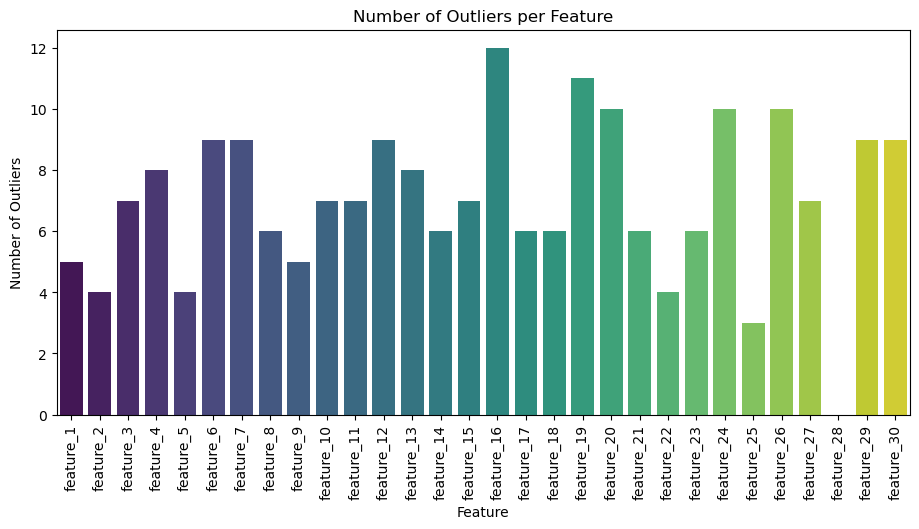

In [93]:
# Plotting the number of outliers per feature using a bar plot
plt.figure(figsize=(11, 5))
sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()), palette='viridis')  # Ensure correct palette usage
plt.xticks(rotation=90)
plt.title("Number of Outliers per Feature")
plt.xlabel("Feature")
plt.ylabel("Number of Outliers")
plt.show()


**Removal of outliers from the dataset.**

In [103]:
z_scores = np.abs(zscore(data_scaled[numerical_columns]))
outliers = (z_scores > 3).any(axis=1)
data_no_outliers = data_scaled[~outliers]


**Splitting and Training the model**

In [106]:
# Separating features and target variable
X = data_no_outliers.drop("Diagnosis", axis=1)
y = data_no_outliers["Diagnosis"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier
ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada_model.fit(X_train, y_train)

# Predict and Evaluate Model Performance
y_pred = ada_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


C:\Users\91979\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**Performance Metrics**

In [131]:
print("\nModel Performance Metrics (After Removing Outliers):")
print(f"{'Metric':<15}{'Score':<10}")
print("-" * 25)
print(f"{'Accuracy':<15}{accuracy:.2f}")
print(f"{'Precision':<15}{precision:.2f}")
print(f"{'Recall':<15}{recall:.2f}")
print(f"{'F1 Score':<15}{f1:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)


Model Performance Metrics (After Removing Outliers):
Metric         Score     
-------------------------
Accuracy       1.00
Precision      1.00
Recall         1.00
F1 Score       1.00

Confusion Matrix:
 [[61  0]
 [ 0 38]]


**Visualization of Model Performance Metrics and Confusion Matrix (After Outlier Removal)**

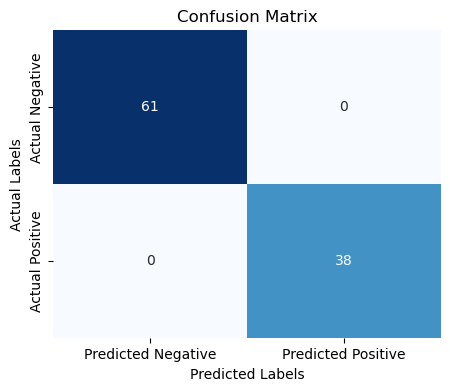

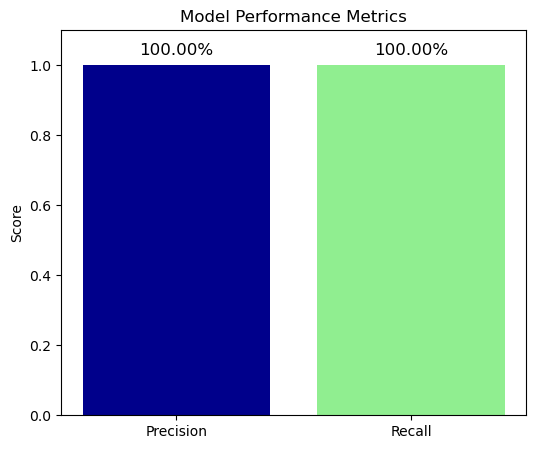

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Example values from your output
accuracy = 1.00
precision = 1.00
recall = 1.00
f1 = 1.00

# Confusion matrix
conf_matrix = np.array([[61, 0], [0, 38]])

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Predicted Negative", "Predicted Positive"], 
            yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

# Performance metrics bar chart
metrics = ['Precision', 'Recall']
scores = [precision, recall]

# Create the bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(metrics, scores, color=['darkblue', 'lightgreen'])
plt.ylim(0, 1.1)  # To make sure the bars fit well within the range
plt.title('Model Performance Metrics')
plt.ylabel('Score')

# Add percentage values above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height*100:.2f}%', 
             ha='center', va='bottom', fontsize=12, color='black')

plt.show()




**Print Classification Report**

In [138]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

Classification Report:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        61
   Malignant       1.00      1.00      1.00        38

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

